In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Datasets

In [2]:
def loadCSV(filename):
    file = filename
    if '.csv' not in filename:
        file += '.csv'
    data = pd.read_csv(file, encoding = 'ISO-8859-1')
    return data

In [3]:
d1 = loadCSV('tweetset_1')
d2 = loadCSV('tweetset_2')

In [4]:
p1 = loadCSV('processed_1')
p2 = loadCSV('processed_2')

In [5]:
def chooseData(num, raw = True):
    if num == 1:
        if raw: return d1
        else: return p1
    elif num == 2:
        if raw: return d2
        else: return p2

# Standardize Tweetset

In [6]:
d1 = d1.rename(columns = {'does_this_tweet_contain_hate_speech':'class',
                          'tweet_text':'tweet'})
    
originalClass = ['The tweet is not offensive',
                 'The tweet uses offensive language but not hate speech',
                 'The tweet contains hate speech']
newClass = [0, 1, 2]

d1['class'] = d1['class'].replace(originalClass, newClass)
d1 = d1[['tweet', 'class']]

In [7]:
originalClass = [0, 1, 2]
newClass = [2, 1, 0]
d2['class'] = d2['class'].replace(originalClass, newClass)
d2 = d2[['tweet', 'class']]

# Symbol Counts

In [8]:
def symbolCount(data, symbol, raw = True):
    
    all_tweets = 0
    neutral = 0
    offensive = 0
    hate = 0
    
    for index, row in data.iterrows():
        tweet = row['tweet']
        category = row['class']
        
        if symbol in tweet:
            all_tweets += 1
            if category == 0:
                neutral += 1
            elif category == 1:
                offensive += 1
            elif category == 2:
                hate += 1
    
    if raw:
        return [all_tweets, neutral, offensive, hate], ['All Classes', 'Neutral Class', 'Offensive Class', 'Hate Class']
    else:
        return [all_tweets, neutral, offensive], ['All Classes', 'Neutral Class', 'Hate/Offensive Class']

In [9]:
def createTable(dataset_num, symbol, raw = True, data_title = False):
    data = chooseData(dataset_num, symbol)
    counts, title = symbolCount(data, symbol, raw = True)
    
    dt = ''
    if data_title:
        dt = data_title
    else:
        dt = 'Tweets "%s" Appears in Tweetset #%s' % (symbol, dataset_num)
    print(dt)
        
    labels = ['Category', 'Count']
    table_vals = [['No "%s"' % symbol, len(data['tweet']) - counts[0]]]
    for i in range(0, len(counts)):
        table_vals.append([title[i], counts[i]])
    tbl = plt.table(cellText = table_vals, colWidths=[0.1] * 3, colLabels = labels, loc = 'center')
    tbl.scale(4, 4)
    tbl.set_fontsize(24)
    
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)

    plt.show()
    
    print(" ")
    
    plt.bar(title, counts)
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.title(dt)
    plt.show()

# Symbol Distributions

In [10]:
def iterateCount(dictionary, num):
    try:
        dictionary[num] += 1
    except KeyError:
        dictionary[num] = 1

In [11]:
def symbolDist(data, symbol, raw = True):
    all_tweets = {}
    neutral = {}
    offensive = {}
    hate = {}
    
    for index, row in data.iterrows():
        category = row['class']
        instances = row['tweet'].count(symbol)
        
        iterateCount(all_tweets, instances)
        if category == 0:
            iterateCount(neutral, instances)
        elif category == 1:
            iterateCount(offensive, instances)
        elif category == 2:
            iterateCount(hate, instances)
    
    if raw:
        return [all_tweets, neutral, offensive, hate], ['All Classes', 'Neutral Class', 'Offensive Class', 'Hate Class']
    else:
        return [all_tweets, neutral, offensive], ['All Classes', 'Neutral Class', 'Hate/Offensive Class']

In [12]:
def formatDist(dictionary):
    
    x = []
    y = []
    keys = list(dictionary.keys())
    
    for k in range(0, 10):
        x.append(str(k))
        if k in keys:
            y.append(dictionary[k])
        else:
            y.append(0)
    
    excess_keys = [k for k in keys if k >= 10]
    excess = 0
    for k in excess_keys:
        excess += dictionary[k]
    x.append('10+')
    y.append(excess)
    
    return x, y

In [13]:
def plotDist(dictionary, symbol, name):
    x, y = formatDist(dictionary)
    
    f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw = {'width_ratios': [4, 1]})
    ax0.bar(x[1:], y[1:], align = 'center', alpha = 0.5)
    ax0.set_xlabel('Instances of "%s" in a Tweet' % symbol)
    ax0.set_ylabel('Number of Tweets')
    ax0.set_title('Distribution of "%s" Count - %s' % (symbol, name))
    
    labels = ['Instances of "%s" in a Tweet' % symbol, 'Number of Tweets']
    table_vals = []
    for i in range(0, len(x)):
        table_vals.append([x[i], y[i]])
    tbl = ax1.table(cellText = table_vals, colLabels = labels, loc = 'right')
    tbl.scale(4,1.5)
    tbl.set_fontsize(18)
    ax1.axis('tight')
    ax1.axis('off')

    plt.show()

In [14]:
def createDist(dataset_num, symbol, raw = True, data_title = False):
    data = chooseData(dataset_num, symbol)
    dists, title = symbolDist(data, symbol, raw)
    
    if data_title:
        print(data_title)
    else:
        print('Tweetset #%s: Distribution of "%s"' % (dataset_num, symbol))
        
    for i in range(0, len(dists)):
        print(" ")
        print(title[i])
        plotDist(dists[i], symbol, title[i])

# "!" in Tweetset #1

Tweets "!" Appears in Tweetset #1


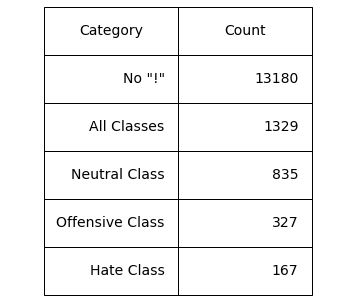

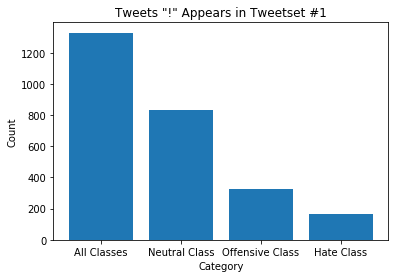

In [15]:
createTable(1, "!")

Tweetset #1: Distribution of "!"
 
All Classes


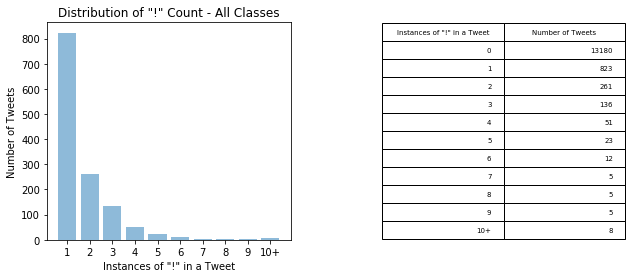

 
Neutral Class


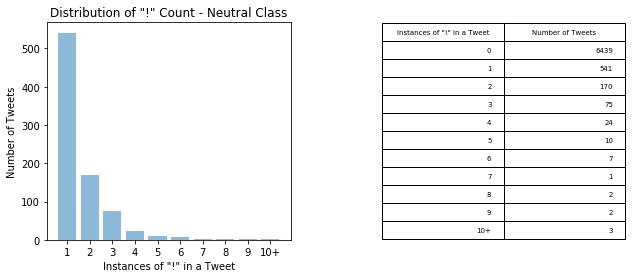

 
Offensive Class


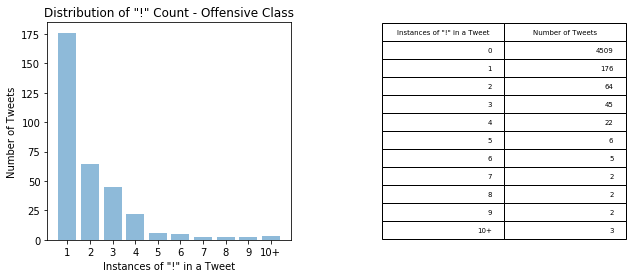

 
Hate Class


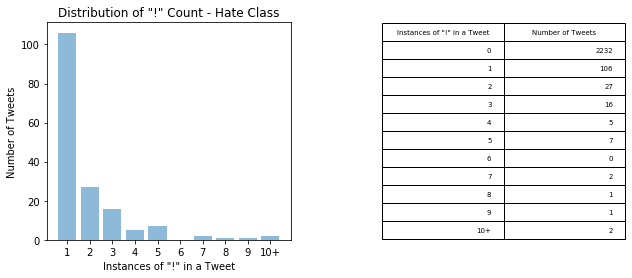

In [16]:
createDist(1, "!")

# "!" in Tweetset #2

Tweets "!" Appears in Tweetset #2


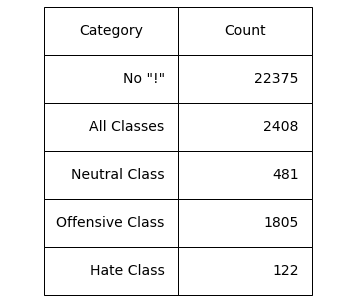

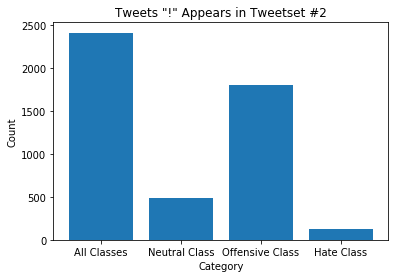

In [17]:
createTable(2, "!")

Tweetset #2: Distribution of "!"
 
All Classes


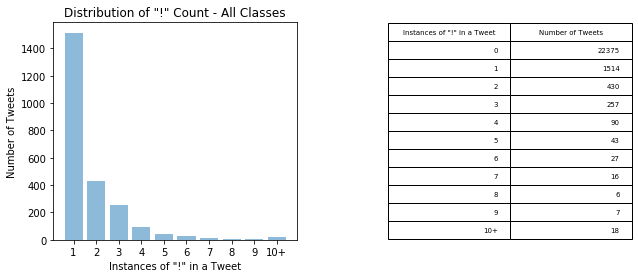

 
Neutral Class


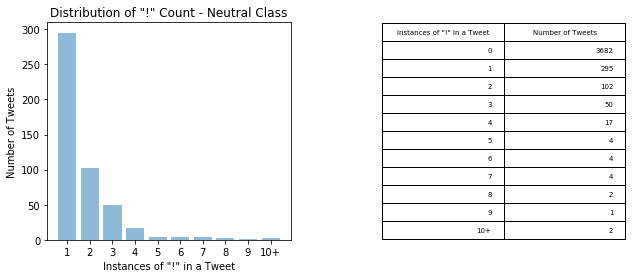

 
Offensive Class


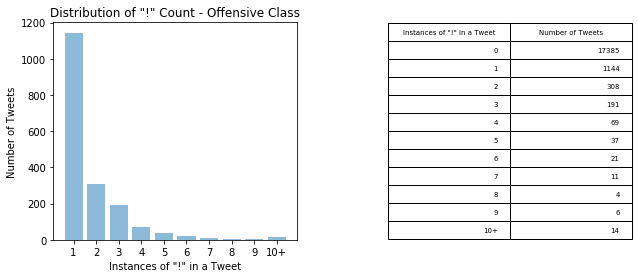

 
Hate Class


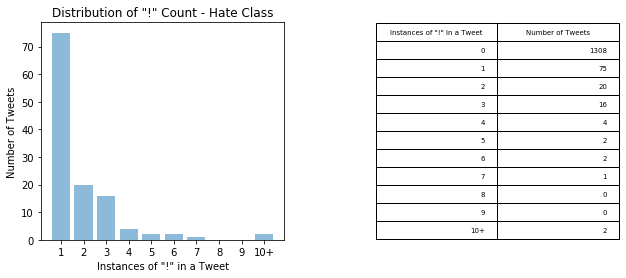

In [18]:
createDist(2, "!")

# "?" in Tweetset #1

Tweets "?" Appears in Tweetset #1


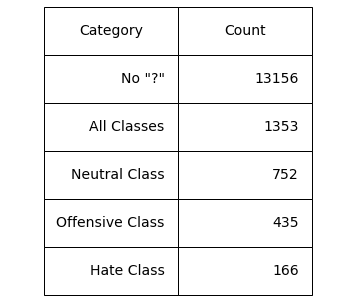

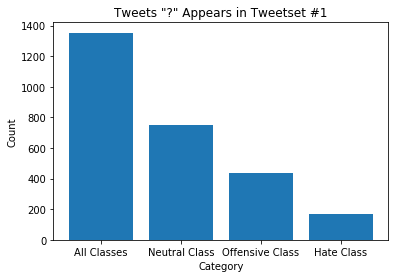

In [19]:
createTable(1, "?")

Tweetset #1: Distribution of "?"
 
All Classes


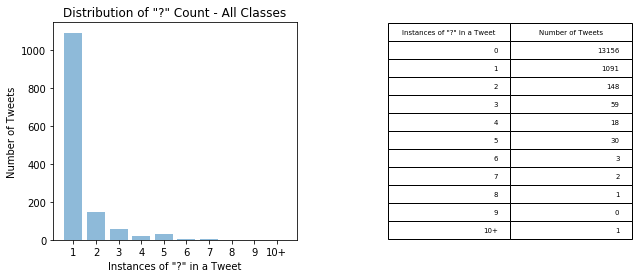

 
Neutral Class


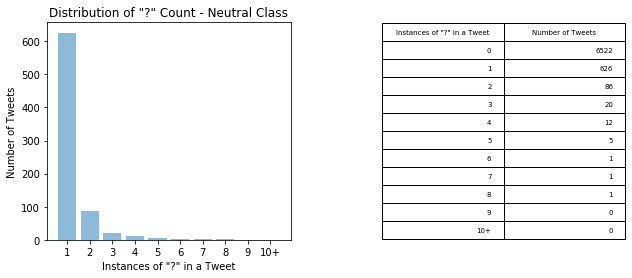

 
Offensive Class


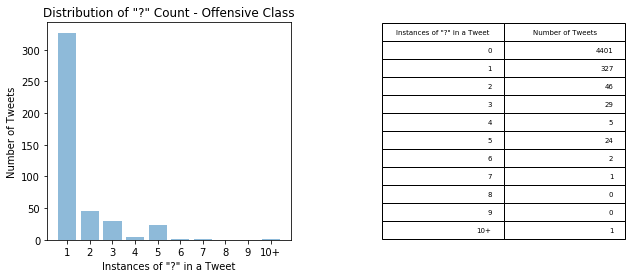

 
Hate Class


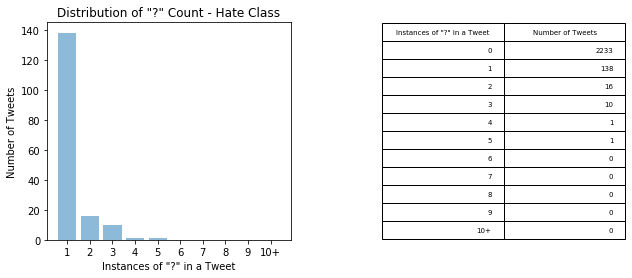

In [20]:
createDist(1, "?")

# "?" in Tweetset #2

Tweets "?" Appears in Tweetset #2


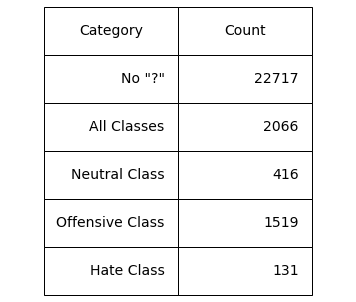

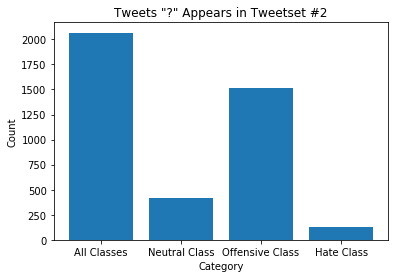

In [21]:
createTable(2, "?")

Tweetset #2: Distribution of "?"
 
All Classes


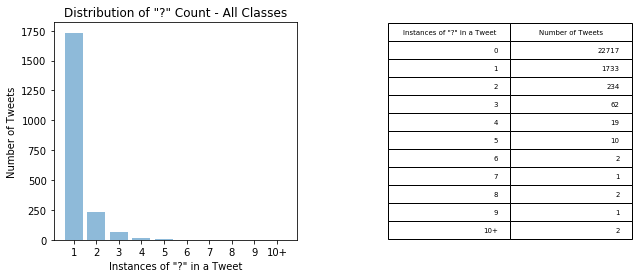

 
Neutral Class


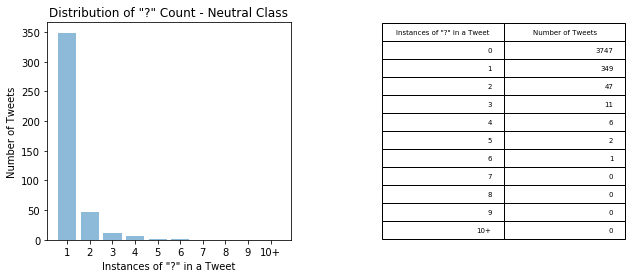

 
Offensive Class


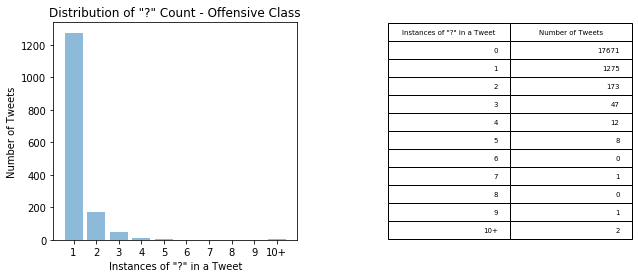

 
Hate Class


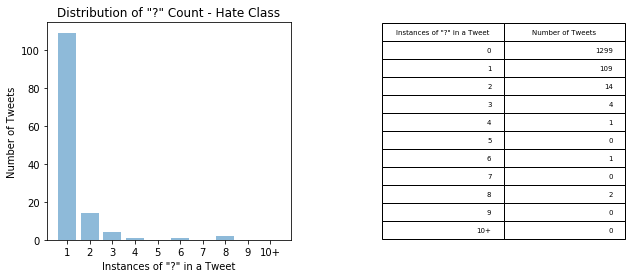

In [22]:
createDist(2, "?")

# Hashtags in Tweetset #1

Hashtag Count in Tweetset #1


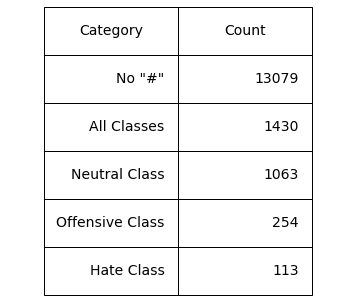

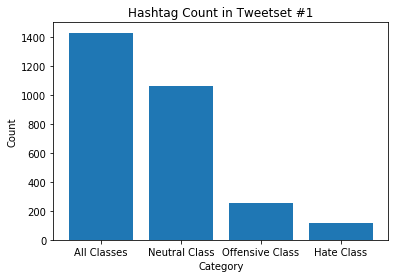

In [23]:
createTable(1, "#", data_title = "Hashtag Count in Tweetset #1")

Hashtag Distribution in Tweetset #1
 
All Classes


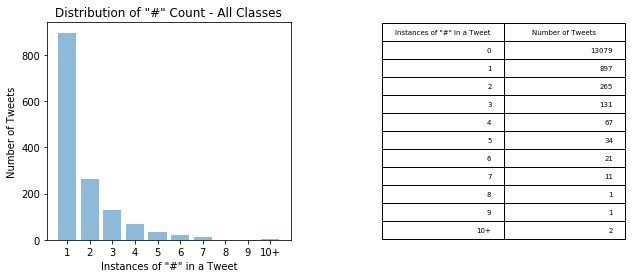

 
Neutral Class


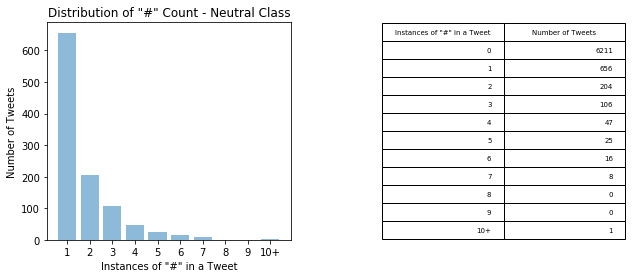

 
Offensive Class


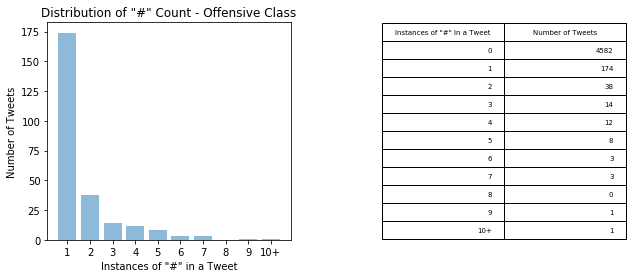

 
Hate Class


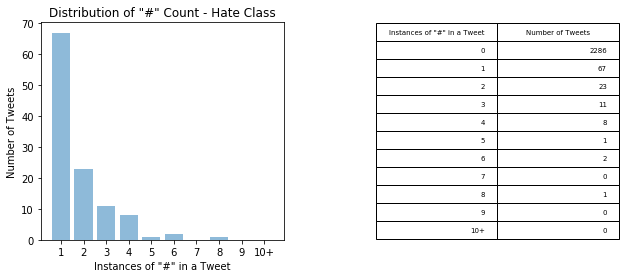

In [24]:
createDist(1, "#", data_title = "Hashtag Distribution in Tweetset #1")

# Hashtags in Tweetset #2

Hashtag Count in Tweetset #2


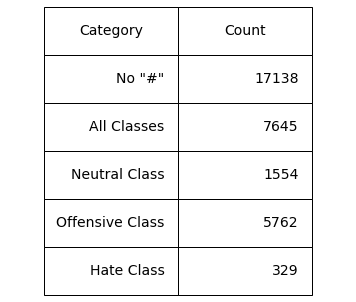

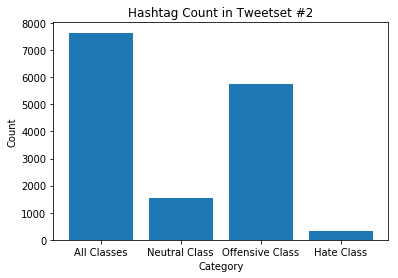

In [25]:
createTable(2, "#", data_title = "Hashtag Count in Tweetset #2")

Hashtag Distribution in Tweetset #2
 
All Classes


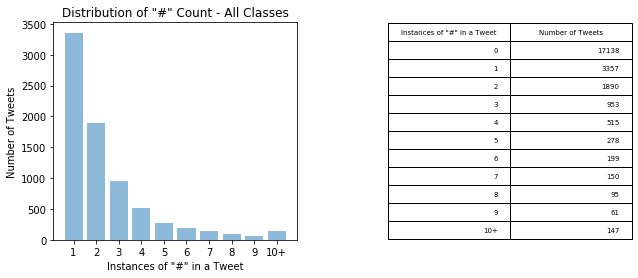

 
Neutral Class


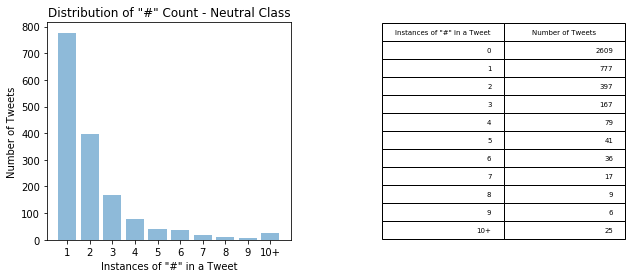

 
Offensive Class


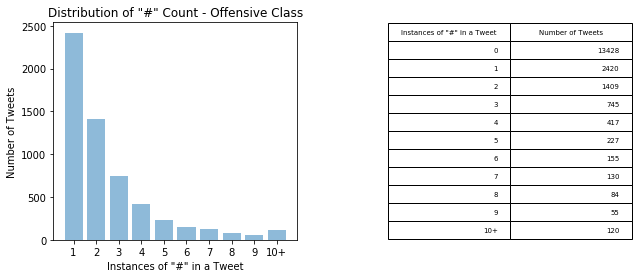

 
Hate Class


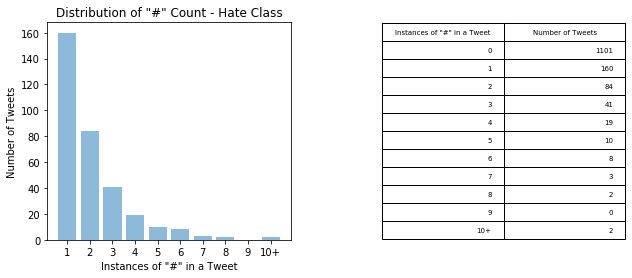

In [26]:
createDist(2, "#", data_title = "Hashtag Distribution in Tweetset #2")

# Twitter Mentions in Tweetset #1

Twitter Mentions in Tweetset #1


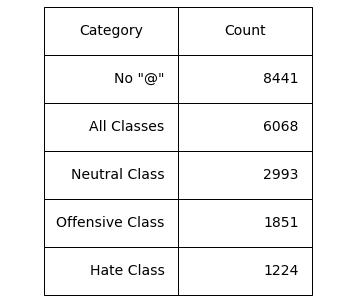

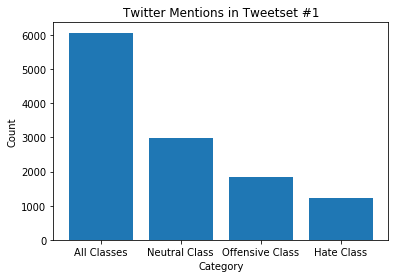

In [27]:
createTable(1, "@", data_title = "Twitter Mentions in Tweetset #1")

Twitter Mentions Distribution in Tweetset #1
 
All Classes


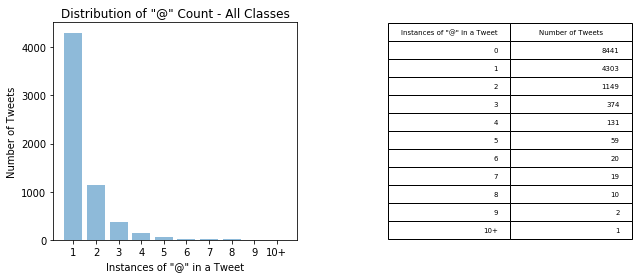

 
Neutral Class


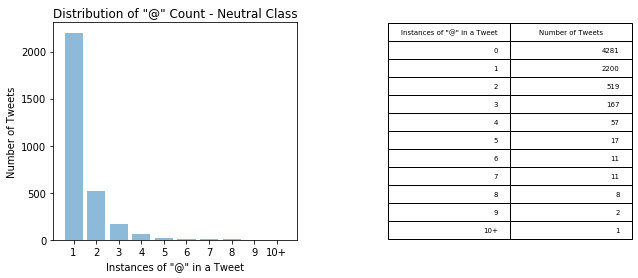

 
Offensive Class


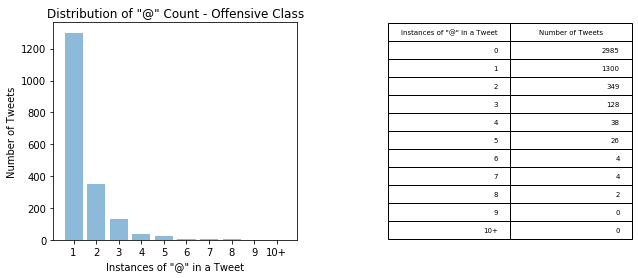

 
Hate Class


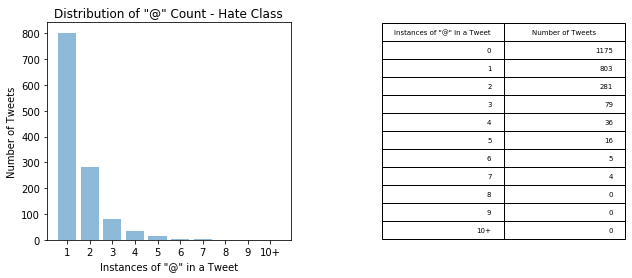

In [28]:
createDist(1, "@", data_title = "Twitter Mentions Distribution in Tweetset #1")

# Twitter Mentions in Tweetset #2

Twitter Mentions in Tweetset #2


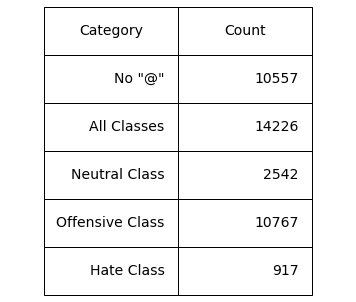

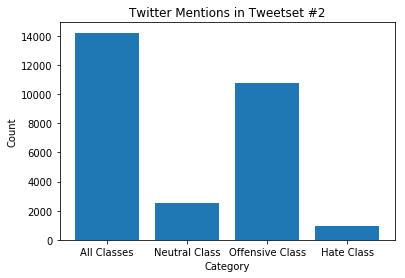

In [29]:
createTable(2, "@", data_title = "Twitter Mentions in Tweetset #2")

Twitter Mentions Distribution in Tweetset #2
 
All Classes


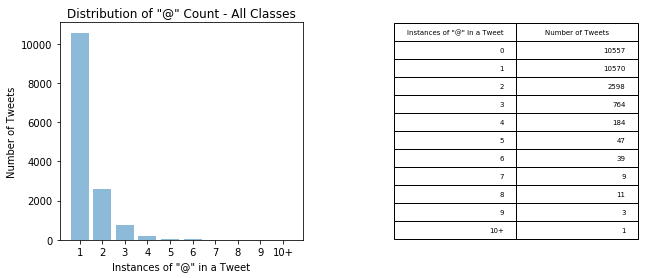

 
Neutral Class


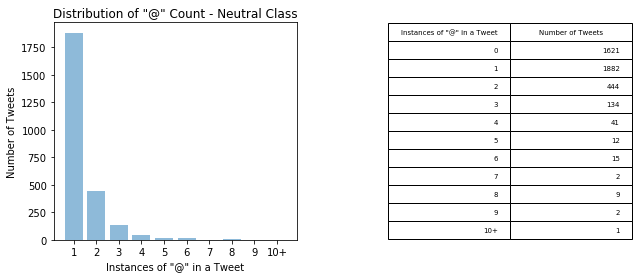

 
Offensive Class


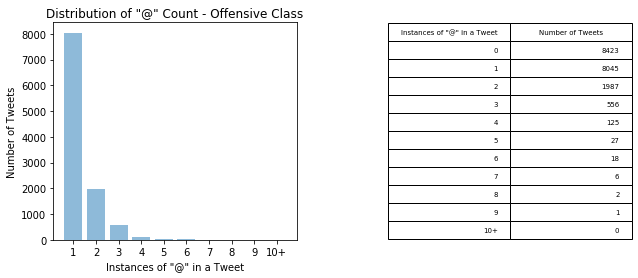

 
Hate Class


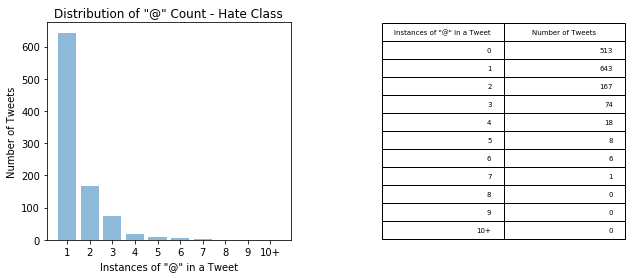

In [30]:
createDist(2, "@", data_title = "Twitter Mentions Distribution in Tweetset #2")